In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Conv1D, GlobalAveragePooling1D, MaxPooling1D,Flatten
from sklearn.preprocessing import MinMaxScaler 
from tensorflow import keras
from tensorflow.keras import regularizers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Datasets/NOA/NAO_data.csv',header=None)
dataset.drop(columns=dataset.columns[1575], axis=1, inplace=True)
name = dataset.pop(1577)
dataset.insert(0, 'Name', name, allow_duplicates = True)
dataset

,Name,0,1,2,3,4,5,6,7,8,...,1566,1567,1568,1569,1570,1571,1572,1573,1574,1576
0,A00250,192.0,189.4,170.3,138.3,98.1,55.0,14.1,-20.1,-44.7,...,-229.5,-195.1,-140.0,-68.1,14.5,100.1,180.4,247.2,294.1,0.0
1,A00250,223.7,223.1,191.2,135.2,65.2,-5.5,-65.2,-106.3,-121.9,...,-326.0,-308.6,-259.9,-186.3,-94.4,5.4,99.1,175.7,226.6,0.0
2,A00250,249.3,244.0,210.8,156.6,90.8,24.8,-31.1,-70.4,-89.7,...,-391.2,-367.3,-313.7,-234.0,-135.2,-28.4,72.1,154.9,211.2,0.0
3,A00250,262.9,260.7,229.2,175.1,107.5,37.4,-23.5,-68.0,-91.9,...,-366.2,-336.0,-279.6,-200.8,-106.1,-7.0,84.8,159.4,209.2,0.0
4,A00250,-387.7,-352.4,-288.3,-201.2,-100.1,2.9,93.6,161.7,200.5,...,-275.9,-249.8,-200.6,-131.5,-48.7,37.5,116.7,180.4,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91760,A08525,-1121.8,-1102.9,-1060.5,-996.3,-912.7,-813.4,-702.7,-585.1,-465.8,...,-502.7,-592.0,-682.7,-770.9,-852.2,-922.5,-978.0,-1015.3,-1032.1,2.0
91761,A08525,707.8,693.9,666.3,626.4,576.5,519.4,458.3,396.3,336.3,...,-499.9,-602.7,-708.5,-812.3,-908.8,-992.6,-1058.7,-1103.0,-1122.3,2.0
91762,A08525,-1020.0,-993.7,-948.0,-884.7,-806.1,-715.2,-615.5,-510.8,-405.3,...,-521.5,-605.7,-690.0,-771.1,-845.2,-908.8,-958.6,-991.7,-1006.0,2.0
91763,A08525,-1044.6,-1022.5,-980.2,-919.0,-841.2,-749.8,-648.6,-541.4,-432.5,...,-512.2,-605.5,-700.7,-794.0,-881.4,-959.0,-1022.9,-1069.8,-1097.2,2.0


In [ ]:
toValData = pd.read_csv('drive/MyDrive/Colab Notebooks/Datasets/NOA/ValidationDataList.txt', names=['Name'])
toValData

,Name
0,A01664
1,A03978
2,A05642
3,A05706
4,A05164
...,...
396,A04184
397,A00443
398,A00373
399,A04575


In [ ]:
valData = toValData.join(dataset.set_index('Name'), on='Name')
valData

,Name,0,1,2,3,4,5,6,7,8,...,1566,1567,1568,1569,1570,1571,1572,1573,1574,1576
0,A01664,-880.0,-877.6,-823.9,-725.9,-595.0,-445.4,-292.2,-150.0,-31.0,...,597.0,490.3,338.6,148.9,-66.4,-290.6,-504.6,-688.9,-826.0,0.0
0,A01664,-948.2,-909.1,-796.0,-624.8,-417.6,-199.6,4.2,172.1,286.9,...,680.0,588.8,442.4,251.9,33.5,-191.5,-399.8,-568.7,-679.4,0.0
0,A01664,-952.8,-921.6,-820.1,-662.5,-469.3,-263.7,-69.0,94.4,211.8,...,529.5,423.5,268.4,74.0,-144.3,-366.8,-571.8,-738.6,-850.1,0.0
0,A01664,-979.6,-976.2,-902.2,-768.6,-592.7,-395.8,-200.1,-26.6,108.5,...,553.7,437.8,271.5,64.8,-166.0,-400.3,-615.4,-789.5,-904.7,0.0
0,A01664,-903.0,-892.9,-811.2,-670.7,-491.0,-294.8,-105.4,56.0,169.1,...,575.0,479.4,321.6,117.4,-115.3,-354.0,-574.2,-752.4,-869.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,A02315,515.4,480.8,416.6,327.7,222.1,110.6,6.3,-80.6,-142.6,...,96.6,141.6,196.9,260.9,330.4,399.4,460.5,506.2,529.6,2.0
400,A02315,534.0,501.4,436.4,343.0,229.5,107.3,-8.1,-104.9,-173.7,...,91.3,125.5,171.1,228.6,296.5,370.4,441.6,501.1,539.5,2.0
400,A02315,524.3,490.2,422.8,327.2,212.2,90.2,-23.8,-118.5,-185.2,...,93.0,138.2,191.4,251.6,316.4,381.1,439.2,483.6,507.7,2.0
400,A02315,560.5,532.3,470.0,378.7,267.0,147.0,33.8,-61.2,-129.7,...,93.9,133.2,186.3,252.4,328.0,406.7,478.7,534.5,565.3,2.0


In [ ]:
typen = valData.pop(1576)
valData.insert(1, 'Type', typen, allow_duplicates = True)
valData

,Name,Type,0,1,2,3,4,5,6,7,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,A01664,0.0,-880.0,-877.6,-823.9,-725.9,-595.0,-445.4,-292.2,-150.0,...,657.2,597.0,490.3,338.6,148.9,-66.4,-290.6,-504.6,-688.9,-826.0
0,A01664,0.0,-948.2,-909.1,-796.0,-624.8,-417.6,-199.6,4.2,172.1,...,711.5,680.0,588.8,442.4,251.9,33.5,-191.5,-399.8,-568.7,-679.4
0,A01664,0.0,-952.8,-921.6,-820.1,-662.5,-469.3,-263.7,-69.0,94.4,...,582.5,529.5,423.5,268.4,74.0,-144.3,-366.8,-571.8,-738.6,-850.1
0,A01664,0.0,-979.6,-976.2,-902.2,-768.6,-592.7,-395.8,-200.1,-26.6,...,615.7,553.7,437.8,271.5,64.8,-166.0,-400.3,-615.4,-789.5,-904.7
0,A01664,0.0,-903.0,-892.9,-811.2,-670.7,-491.0,-294.8,-105.4,56.0,...,612.4,575.0,479.4,321.6,117.4,-115.3,-354.0,-574.2,-752.4,-869.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,A02315,2.0,515.4,480.8,416.6,327.7,222.1,110.6,6.3,-80.6,...,62.8,96.6,141.6,196.9,260.9,330.4,399.4,460.5,506.2,529.6
400,A02315,2.0,534.0,501.4,436.4,343.0,229.5,107.3,-8.1,-104.9,...,68.0,91.3,125.5,171.1,228.6,296.5,370.4,441.6,501.1,539.5
400,A02315,2.0,524.3,490.2,422.8,327.2,212.2,90.2,-23.8,-118.5,...,56.9,93.0,138.2,191.4,251.6,316.4,381.1,439.2,483.6,507.7
400,A02315,2.0,560.5,532.3,470.0,378.7,267.0,147.0,33.8,-61.2,...,68.9,93.9,133.2,186.3,252.4,328.0,406.7,478.7,534.5,565.3


In [ ]:
dataset = dataset[~dataset['Name'].isin(toValData['Name'])]
dataset

,Name,0,1,2,3,4,5,6,7,8,...,1566,1567,1568,1569,1570,1571,1572,1573,1574,1576
0,A00250,192.0,189.4,170.3,138.3,98.1,55.0,14.1,-20.1,-44.7,...,-229.5,-195.1,-140.0,-68.1,14.5,100.1,180.4,247.2,294.1,0.0
1,A00250,223.7,223.1,191.2,135.2,65.2,-5.5,-65.2,-106.3,-121.9,...,-326.0,-308.6,-259.9,-186.3,-94.4,5.4,99.1,175.7,226.6,0.0
2,A00250,249.3,244.0,210.8,156.6,90.8,24.8,-31.1,-70.4,-89.7,...,-391.2,-367.3,-313.7,-234.0,-135.2,-28.4,72.1,154.9,211.2,0.0
3,A00250,262.9,260.7,229.2,175.1,107.5,37.4,-23.5,-68.0,-91.9,...,-366.2,-336.0,-279.6,-200.8,-106.1,-7.0,84.8,159.4,209.2,0.0
4,A00250,-387.7,-352.4,-288.3,-201.2,-100.1,2.9,93.6,161.7,200.5,...,-275.9,-249.8,-200.6,-131.5,-48.7,37.5,116.7,180.4,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91743,A08520,631.1,591.9,515.3,407.9,279.3,145.3,21.0,-82.2,-150.1,...,111.2,159.6,222.7,296.2,376.1,455.7,525.7,578.2,606.1,2.0
91744,A08520,639.5,614.0,552.0,457.8,339.7,208.6,80.0,-34.0,-123.8,...,62.7,111.8,174.4,249.2,332.9,419.1,499.2,564.5,607.1,2.0
91745,A08520,565.9,546.9,497.3,420.6,323.3,215.1,108.8,13.9,-60.1,...,82.9,133.5,197.6,273.0,356.2,441.0,518.2,579.4,616.6,2.0
91746,A08520,637.3,617.9,558.8,464.4,341.1,207.5,77.8,-30.8,-110.2,...,64.0,103.7,158.5,230.2,313.4,402.4,487.1,556.9,602.3,2.0


In [ ]:
Y_ = dataset.iloc[:,-1]
Y_

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91743    2.0
91744    2.0
91745    2.0
91746    2.0
91747    2.0
Name: 1576, Length: 87130, dtype: float64

In [ ]:
dataset.drop(columns=dataset.columns[0], axis=1, inplace=True)
dataset.drop(columns=dataset.columns[-1], axis=1, inplace=True)
dataset

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,2,3,4,5,6,7,8,9,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,192.0,189.4,170.3,138.3,98.1,55.0,14.1,-20.1,-44.7,-58.1,...,-242.0,-229.5,-195.1,-140.0,-68.1,14.5,100.1,180.4,247.2,294.1
1,223.7,223.1,191.2,135.2,65.2,-5.5,-65.2,-106.3,-121.9,-113.1,...,-314.8,-326.0,-308.6,-259.9,-186.3,-94.4,5.4,99.1,175.7,226.6
2,249.3,244.0,210.8,156.6,90.8,24.8,-31.1,-70.4,-89.7,-86.3,...,-382.5,-391.2,-367.3,-313.7,-234.0,-135.2,-28.4,72.1,154.9,211.2
3,262.9,260.7,229.2,175.1,107.5,37.4,-23.5,-68.0,-91.9,-93.9,...,-369.4,-366.2,-336.0,-279.6,-200.8,-106.1,-7.0,84.8,159.4,209.2
4,-387.7,-352.4,-288.3,-201.2,-100.1,2.9,93.6,161.7,200.5,207.1,...,-278.6,-275.9,-249.8,-200.6,-131.5,-48.7,37.5,116.7,180.4,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91743,631.1,591.9,515.3,407.9,279.3,145.3,21.0,-82.2,-150.1,-184.0,...,75.2,111.2,159.6,222.7,296.2,376.1,455.7,525.7,578.2,606.1
91744,639.5,614.0,552.0,457.8,339.7,208.6,80.0,-34.0,-123.8,-181.0,...,27.4,62.7,111.8,174.4,249.2,332.9,419.1,499.2,564.5,607.1
91745,565.9,546.9,497.3,420.6,323.3,215.1,108.8,13.9,-60.1,-107.1,...,45.5,82.9,133.5,197.6,273.0,356.2,441.0,518.2,579.4,616.6
91746,637.3,617.9,558.8,464.4,341.1,207.5,77.8,-30.8,-110.2,-156.5,...,37.2,64.0,103.7,158.5,230.2,313.4,402.4,487.1,556.9,602.3


In [ ]:
X = dataset.to_numpy()
Y = Y_.to_numpy()
Y

array([0., 0., 0., ..., 2., 2., 2.])

In [ ]:
valDataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Datasets/NOA/NAO_data_validation.csv',header=None)
valDataset.drop(columns=valDataset.columns[1575], axis=1, inplace=True)
valDataset

,0,1,2,3,4,5,6,7,8,9,...,1566,1567,1568,1569,1570,1571,1572,1573,1574,1576
0,658.1,624.0,565.2,484.7,387.4,279.6,168.7,61.9,-33.8,-113.0,...,175.2,241.1,316.4,398.4,483.1,565.4,639.0,697.3,734.0,A00001
1,591.7,575.9,537.3,477.3,399.0,307.2,208.0,108.1,14.3,-67.4,...,209.5,268.5,335.2,407.3,481.3,552.2,614.1,660.7,685.9,A00001
2,674.6,651.8,600.0,521.0,419.3,301.6,176.0,51.5,-63.2,-160.7,...,82.6,120.7,166.0,215.9,266.7,313.7,351.8,375.9,381.4,A00001
3,714.5,688.9,631.0,543.3,431.0,302.1,166.0,33.1,-86.8,-185.3,...,188.8,252.2,322.7,397.6,473.2,544.6,606.1,651.6,675.5,A00001
4,727.9,711.3,662.3,582.7,477.1,353.1,219.7,87.3,-34.4,-136.7,...,185.8,250.1,324.6,406.9,493.2,578.2,655.4,717.5,757.6,A00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062,349.4,339.6,315.9,279.1,230.9,174.1,112.0,48.5,-12.4,-67.0,...,274.3,220.9,157.3,87.1,14.7,-55.3,-118.4,-170.7,-209.0,A00220
9063,-283.1,-287.5,-279.2,-259.7,-231.3,-196.4,-158.1,-119.0,-82.0,-49.5,...,64.9,101.9,143.1,186.8,231.3,274.1,312.3,343.2,363.8,A00220
9064,372.4,362.3,339.1,303.1,255.8,199.3,136.2,70.0,4.3,-57.5,...,248.1,195.0,133.3,66.3,-2.4,-68.6,-128.6,-178.8,-216.6,A00220
9065,359.7,342.9,313.5,272.2,220.5,160.7,95.6,28.4,-37.3,-96.6,...,87.9,124.9,165.3,207.5,249.7,289.8,325.3,353.9,373.0,A00220


In [ ]:
valTypeDataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Datasets/NOA/NAO_data_REFERENCEValidation.csv', names = ['Name', 'Type'])
valTypeDataset

,Name,Type
0,A00001,N
1,A00002,N
2,A00003,N
3,A00004,A
4,A00005,A
...,...,...
295,A04452,~
296,A04522,~
297,A04701,~
298,A04735,~


In [ ]:
validationData = valTypeDataset.join(valDataset.set_index(1576), on='Name')
validationData

,Name,Type,0,1,2,3,4,5,6,7,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,A00001,N,658.1,624.0,565.2,484.7,387.4,279.6,168.7,61.9,...,119.9,175.2,241.1,316.4,398.4,483.1,565.4,639.0,697.3,734.0
0,A00001,N,591.7,575.9,537.3,477.3,399.0,307.2,208.0,108.1,...,159.1,209.5,268.5,335.2,407.3,481.3,552.2,614.1,660.7,685.9
0,A00001,N,674.6,651.8,600.0,521.0,419.3,301.6,176.0,51.5,...,53.4,82.6,120.7,166.0,215.9,266.7,313.7,351.8,375.9,381.4
0,A00001,N,714.5,688.9,631.0,543.3,431.0,302.1,166.0,33.1,...,133.6,188.8,252.2,322.7,397.6,473.2,544.6,606.1,651.6,675.5
0,A00001,N,727.9,711.3,662.3,582.7,477.1,353.1,219.7,87.3,...,132.5,185.8,250.1,324.6,406.9,493.2,578.2,655.4,717.5,757.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,A04452,~,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,A04522,~,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,A04701,~,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,A04735,~,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
validationData.dropna(inplace=True)
validationData

,Name,Type,0,1,2,3,4,5,6,7,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,A00001,N,658.1,624.0,565.2,484.7,387.4,279.6,168.7,61.9,...,119.9,175.2,241.1,316.4,398.4,483.1,565.4,639.0,697.3,734.0
0,A00001,N,591.7,575.9,537.3,477.3,399.0,307.2,208.0,108.1,...,159.1,209.5,268.5,335.2,407.3,481.3,552.2,614.1,660.7,685.9
0,A00001,N,674.6,651.8,600.0,521.0,419.3,301.6,176.0,51.5,...,53.4,82.6,120.7,166.0,215.9,266.7,313.7,351.8,375.9,381.4
0,A00001,N,714.5,688.9,631.0,543.3,431.0,302.1,166.0,33.1,...,133.6,188.8,252.2,322.7,397.6,473.2,544.6,606.1,651.6,675.5
0,A00001,N,727.9,711.3,662.3,582.7,477.1,353.1,219.7,87.3,...,132.5,185.8,250.1,324.6,406.9,493.2,578.2,655.4,717.5,757.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,A00551,A,678.6,650.1,581.4,476.5,344.3,197.1,49.8,-80.9,...,31.5,63.0,106.5,164.1,235.8,317.5,403.8,486.5,556.2,602.6
270,A00551,A,614.9,565.3,476.7,356.4,215.4,67.8,-71.4,-185.1,...,-11.0,30.1,85.9,157.2,243.0,337.0,431.7,517.7,584.6,622.4
270,A00551,A,679.0,642.9,565.9,453.3,315.2,165.0,18.0,-108.3,...,80.7,112.9,158.4,218.9,294.2,379.3,467.6,550.3,617.1,657.7
270,A00551,A,651.6,610.6,528.1,410.1,267.4,114.4,-33.1,-156.1,...,56.1,92.6,142.6,207.2,286.4,374.5,465.0,549.1,616.6,657.3


In [ ]:
validationData.loc[validationData['Type'] =='N', 'Type'] = 0
validationData.loc[validationData['Type'] =='A', 'Type'] = 1
validationData.loc[validationData['Type'] =='O', 'Type'] = 2
validationData

,Name,Type,0,1,2,3,4,5,6,7,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,A00001,0,658.1,624.0,565.2,484.7,387.4,279.6,168.7,61.9,...,119.9,175.2,241.1,316.4,398.4,483.1,565.4,639.0,697.3,734.0
0,A00001,0,591.7,575.9,537.3,477.3,399.0,307.2,208.0,108.1,...,159.1,209.5,268.5,335.2,407.3,481.3,552.2,614.1,660.7,685.9
0,A00001,0,674.6,651.8,600.0,521.0,419.3,301.6,176.0,51.5,...,53.4,82.6,120.7,166.0,215.9,266.7,313.7,351.8,375.9,381.4
0,A00001,0,714.5,688.9,631.0,543.3,431.0,302.1,166.0,33.1,...,133.6,188.8,252.2,322.7,397.6,473.2,544.6,606.1,651.6,675.5
0,A00001,0,727.9,711.3,662.3,582.7,477.1,353.1,219.7,87.3,...,132.5,185.8,250.1,324.6,406.9,493.2,578.2,655.4,717.5,757.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,A00551,1,678.6,650.1,581.4,476.5,344.3,197.1,49.8,-80.9,...,31.5,63.0,106.5,164.1,235.8,317.5,403.8,486.5,556.2,602.6
270,A00551,1,614.9,565.3,476.7,356.4,215.4,67.8,-71.4,-185.1,...,-11.0,30.1,85.9,157.2,243.0,337.0,431.7,517.7,584.6,622.4
270,A00551,1,679.0,642.9,565.9,453.3,315.2,165.0,18.0,-108.3,...,80.7,112.9,158.4,218.9,294.2,379.3,467.6,550.3,617.1,657.7
270,A00551,1,651.6,610.6,528.1,410.1,267.4,114.4,-33.1,-156.1,...,56.1,92.6,142.6,207.2,286.4,374.5,465.0,549.1,616.6,657.3


In [ ]:
validationData = validationData.append(valData)
validationData

,Name,Type,0,1,2,3,4,5,6,7,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,A00001,0,658.1,624.0,565.2,484.7,387.4,279.6,168.7,61.9,...,119.9,175.2,241.1,316.4,398.4,483.1,565.4,639.0,697.3,734.0
0,A00001,0,591.7,575.9,537.3,477.3,399.0,307.2,208.0,108.1,...,159.1,209.5,268.5,335.2,407.3,481.3,552.2,614.1,660.7,685.9
0,A00001,0,674.6,651.8,600.0,521.0,419.3,301.6,176.0,51.5,...,53.4,82.6,120.7,166.0,215.9,266.7,313.7,351.8,375.9,381.4
0,A00001,0,714.5,688.9,631.0,543.3,431.0,302.1,166.0,33.1,...,133.6,188.8,252.2,322.7,397.6,473.2,544.6,606.1,651.6,675.5
0,A00001,0,727.9,711.3,662.3,582.7,477.1,353.1,219.7,87.3,...,132.5,185.8,250.1,324.6,406.9,493.2,578.2,655.4,717.5,757.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,A02315,2.0,515.4,480.8,416.6,327.7,222.1,110.6,6.3,-80.6,...,62.8,96.6,141.6,196.9,260.9,330.4,399.4,460.5,506.2,529.6
400,A02315,2.0,534.0,501.4,436.4,343.0,229.5,107.3,-8.1,-104.9,...,68.0,91.3,125.5,171.1,228.6,296.5,370.4,441.6,501.1,539.5
400,A02315,2.0,524.3,490.2,422.8,327.2,212.2,90.2,-23.8,-118.5,...,56.9,93.0,138.2,191.4,251.6,316.4,381.1,439.2,483.6,507.7
400,A02315,2.0,560.5,532.3,470.0,378.7,267.0,147.0,33.8,-61.2,...,68.9,93.9,133.2,186.3,252.4,328.0,406.7,478.7,534.5,565.3


In [ ]:
Y_val = validationData['Type'].to_numpy()
validationData.drop(columns=['Name', 'Type'], axis=1, inplace=True)
validationData

,0,1,2,3,4,5,6,7,8,9,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,658.1,624.0,565.2,484.7,387.4,279.6,168.7,61.9,-33.8,-113.0,...,119.9,175.2,241.1,316.4,398.4,483.1,565.4,639.0,697.3,734.0
0,591.7,575.9,537.3,477.3,399.0,307.2,208.0,108.1,14.3,-67.4,...,159.1,209.5,268.5,335.2,407.3,481.3,552.2,614.1,660.7,685.9
0,674.6,651.8,600.0,521.0,419.3,301.6,176.0,51.5,-63.2,-160.7,...,53.4,82.6,120.7,166.0,215.9,266.7,313.7,351.8,375.9,381.4
0,714.5,688.9,631.0,543.3,431.0,302.1,166.0,33.1,-86.8,-185.3,...,133.6,188.8,252.2,322.7,397.6,473.2,544.6,606.1,651.6,675.5
0,727.9,711.3,662.3,582.7,477.1,353.1,219.7,87.3,-34.4,-136.7,...,132.5,185.8,250.1,324.6,406.9,493.2,578.2,655.4,717.5,757.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,515.4,480.8,416.6,327.7,222.1,110.6,6.3,-80.6,-142.6,-172.9,...,62.8,96.6,141.6,196.9,260.9,330.4,399.4,460.5,506.2,529.6
400,534.0,501.4,436.4,343.0,229.5,107.3,-8.1,-104.9,-173.7,-203.5,...,68.0,91.3,125.5,171.1,228.6,296.5,370.4,441.6,501.1,539.5
400,524.3,490.2,422.8,327.2,212.2,90.2,-23.8,-118.5,-185.2,-214.4,...,56.9,93.0,138.2,191.4,251.6,316.4,381.1,439.2,483.6,507.7
400,560.5,532.3,470.0,378.7,267.0,147.0,33.8,-61.2,-129.7,-162.1,...,68.9,93.9,133.2,186.3,252.4,328.0,406.7,478.7,534.5,565.3


In [ ]:
X_val = validationData.to_numpy()
X_val

array([[658.1, 624. , 565.2, ..., 639. , 697.3, 734. ],
       [591.7, 575.9, 537.3, ..., 614.1, 660.7, 685.9],
       [674.6, 651.8, 600. , ..., 351.8, 375.9, 381.4],
       ...,
       [524.3, 490.2, 422.8, ..., 439.2, 483.6, 507.7],
       [560.5, 532.3, 470. , ..., 478.7, 534.5, 565.3],
       [549.7, 509.1, 436.4, ..., -12.3,  -4.8,   8.3]])

In [ ]:
y_train = utils.to_categorical(Y, 3)
Y_val = utils.to_categorical(Y_val, 3)

In [ ]:
x_train = X.reshape(X.shape[0],1575,1)
X_val = X_val.reshape(X_val.shape[0],1575,1)

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    0.001,
    decay_rate=0.7,
    decay_steps = 100,
    staircase=True)

In [ ]:
def create_model():
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)
  model = Sequential()
  model.add(Conv1D(50, 190, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(1575, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(5))
  model.add(Conv1D(40, 87, activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(5))
  model.add(Dropout(0.5))
  model.add(Conv1D(30, 20, activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(50, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
#model = keras.models.load_model('drive/MyDrive/Colab Notebooks/models/NAO/model3/NAO_model-32.h5')
#model.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='drive/MyDrive/Colab Notebooks/models/NAO/model3/NAO_model-{epoch:02d}.h5', monitor='val_accuracy', verbose=1, save_best_only=False)
filename='drive/MyDrive/Colab Notebooks/models/NAO/model2/NAO_model_log2.csv'
history_logger=keras.callbacks.CSVLogger(filename, separator=",", append=True)
hist = pd.read_csv(filename )
current_epoch = len(hist.index)

In [ ]:
model = create_model()
current_epoch =0

history = model.fit(x_train, 
          y_train,
          batch_size=800, 
          epochs=20,
          validation_data=(X_val,Y_val),
          verbose=1, shuffle=True,callbacks=[checkpointer, history_logger], initial_epoch = current_epoch)

model.save('drive/MyDrive/Colab Notebooks/Models/NAOtry.h5')

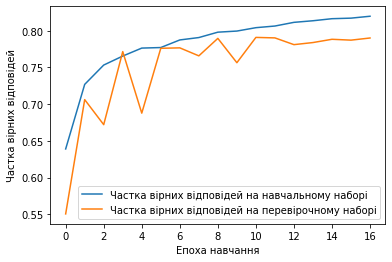

In [ ]:

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(hist['accuracy'], 
         label='Частка вірних відповідей на навчальному наборі')

# Выводим график точности на проверочной выборке
plt.plot(hist['val_accuracy'],  
         label='Частка вірних відповідей на перевірочному наборі')

# Выводим подписи осей
plt.xlabel('Епоха навчання')
plt.ylabel('Частка вірних відповідей')

# Выводим легенду
plt.legend()
plt.show()

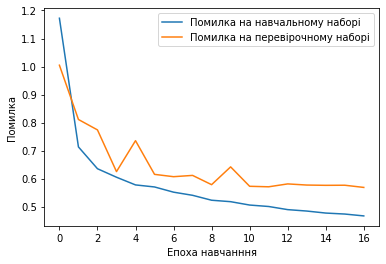

In [ ]:
plt.plot(hist['loss'], 
         label='Помилка на навчальному наборі')
plt.plot(hist['val_loss'], 
         label='Помилка на перевірочному наборі')
plt.xlabel('Епоха навчанння')
plt.ylabel('Помилка')
plt.legend()
plt.show()

In [ ]:
#model = keras.models.load_model('drive/MyDrive/Colab Notebooks/models/NAO/NAO_model1-10.h5')
scores = model.evaluate(X_val, Y_val, verbose=1)
print(scores)
#print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 2), "%", sep="")

NameError: ignored